#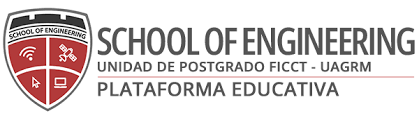

**Maestría en Ciencia de Datos e Inteligencia Artificial V1E4**
##MÓDULO 5 - Análisis Estadístico de Datos
##Técnica de Bootstrapping

**Universidad Autónoma Gabriel René Moreno de Santa Cruz de la Sierra-Bolivia UAGRM - POSTGRADO**<br/>
**Generación Sintética de una Población**<br/>






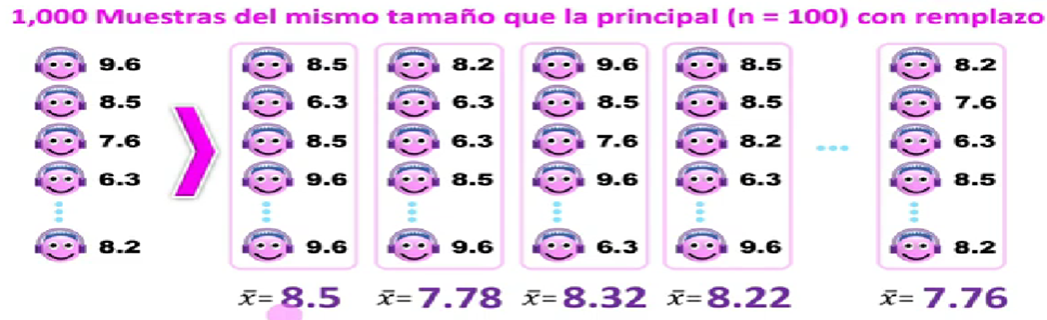

El Bootstrapping es una técnica estadística de remuestreo que consiste en:

Tomar muestras repetidas (con reemplazo) de la misma muestra original, para estimar la variabilidad y la distribución de un estadístico (media, mediana, correlación, regresión, etc.).

Es decir:
En vez de asumir una distribución teórica (normal, t-student, etc.), el Bootstrapping usa los propios datos para estimar los resultados.

**"Si repitiera este estudio muchas veces, cuánto variaría mi estadístico?**

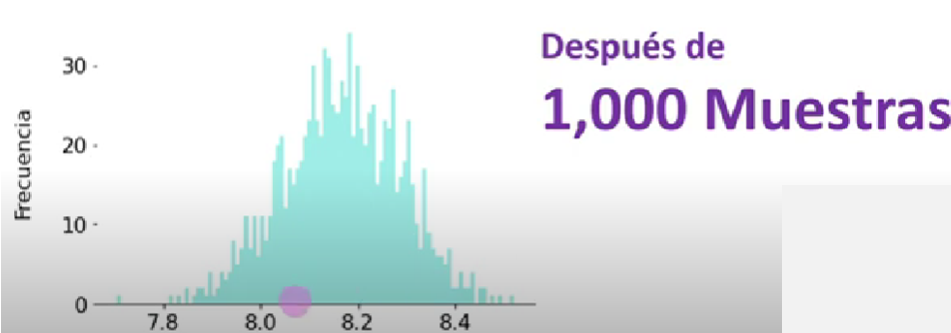

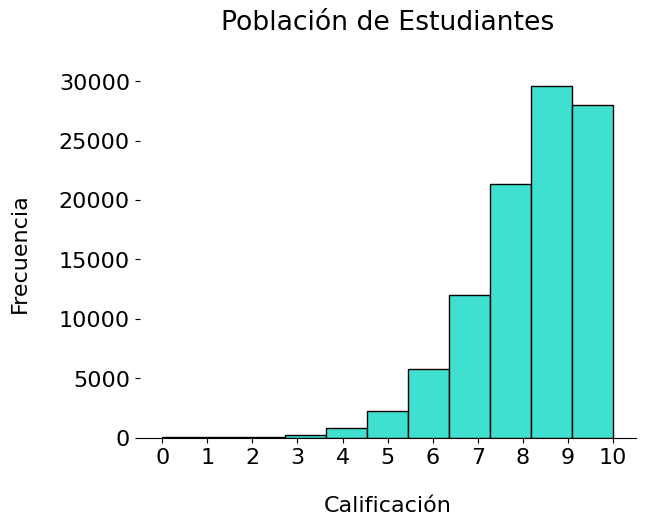

In [1]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

# Detalles de visualización
plt.rcParams["font.size"] = 16
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.left"] = False

# Generación aleatoria de datos sesgados
def datos_sesgados(sesgo, cantidad, maximo):
    aleatorios = stats.skewnorm.rvs(sesgo,
                                    size=cantidad,
                                    random_state=0)
    aleatorios = aleatorios + abs(aleatorios.min())
    aleatorios = np.round(aleatorios, 2)/aleatorios.max() * maximo
    return np.round(aleatorios, 1)

califs = datos_sesgados(-25.0, 100000, 10)

# Visualización de un histograma
plt.hist(califs, bins=11, color="turquoise", edgecolor="black")
plt.title("Población de Estudiantes\n")
plt.xticks(range(0, 11))
plt.xlabel("\nCalificación")
plt.ylabel("Frecuencia\n")
plt.show()

<h2 style="color:purple">Extracción de una Muestra (Principal)</h2>

In [2]:
# 0.1% de la población inicial
tamano_muestra = 100
muestra_principal = np.random.choice(califs,
                                     tamano_muestra)
muestra_principal

array([9.6, 8.8, 9.4, 9.2, 7.3, 9.4, 8.8, 6.8, 9.2, 7. , 8. , 9.8, 6.4,
       9.3, 6.4, 8.2, 9.6, 8.2, 6.4, 5.1, 9. , 9.7, 8.8, 6.8, 9.4, 7.9,
       6.6, 9.2, 8.4, 9.3, 4.6, 8.6, 7.3, 9.7, 9.5, 7.1, 7.6, 5.8, 6.6,
       5.5, 8.7, 7. , 6.3, 9.9, 6.4, 9.6, 7.1, 6.5, 9.7, 5.3, 8.7, 6.8,
       8. , 6.5, 9.3, 8.9, 8.1, 7.5, 7.3, 7.4, 8.6, 7.5, 8.2, 8.8, 9.5,
       7.5, 3.3, 7. , 8.4, 9.2, 9.7, 9. , 7.8, 6.9, 7.2, 7.8, 9.3, 5.3,
       7.3, 7.7, 7.2, 6.6, 8.6, 6.6, 5.4, 8.5, 7.6, 7. , 7.8, 7. , 9. ,
       8.4, 8.3, 8.7, 8.1, 8.5, 9.4, 8.6, 6.6, 9.5])

<h2 style="color:purple">1000 muestras con Bootstrapping</h2>

In [3]:
muestras = np.array([])
num_muestras = 1000
for m in range(num_muestras):
    muestras = np.append(muestras,
                         np.random.choice(califs,
                                          tamano_muestra,
                                          replace=True))
muestras = muestras.reshape(-1, tamano_muestra)
muestras.shape, muestras

((1000, 100),
 array([[8. , 9.1, 9.1, ..., 9.2, 7. , 4.2],
        [9.7, 8.8, 8.2, ..., 8.2, 8.2, 8.7],
        [9.4, 9.5, 6.6, ..., 9.5, 8. , 9.1],
        ...,
        [8.3, 7.2, 9.1, ..., 8.3, 8.8, 9.2],
        [8.1, 9.1, 8. , ..., 8.9, 8.7, 7.9],
        [7.3, 7.4, 9.6, ..., 9.4, 8.2, 9.3]]))

<h1 style="color:purple">Distribución Muestral de la Media</h1>

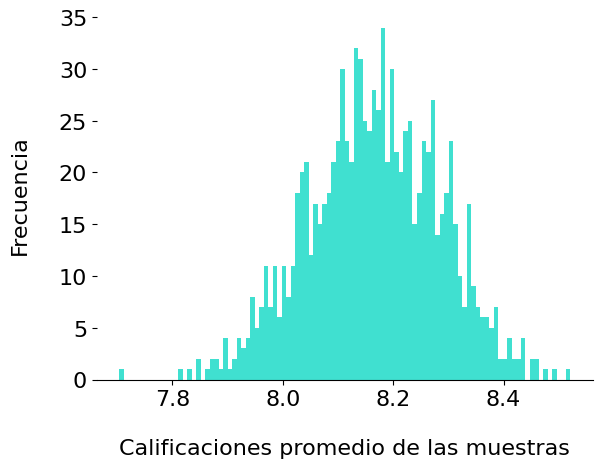

In [4]:
plt.hist(muestras.mean(axis=1), bins=100, color="turquoise")
plt.xlabel("\nCalificaciones promedio de las muestras")
plt.ylabel("Frecuencia\n")
plt.show()

<h1 style="color:purple">Cálculo del Intervalo de Confianza</h1>

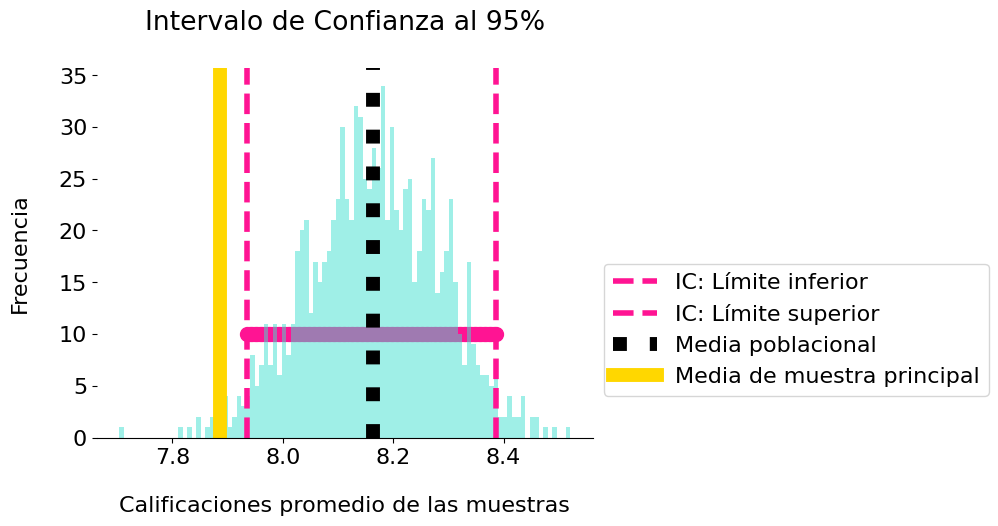

In [5]:
# Cuantil 97.5 – Cuantil 2.5 = Intervalo de Confianza del 95%
intervalo_confianza = np.quantile(muestras.mean(axis=1),
                                  [0.025, 0.975])

# Vectores para graficar el intervalo de confianza
x = np.linspace(intervalo_confianza[0], intervalo_confianza[1], 100)
y = [10] * x.size

# Grafica el rango del intervalo de confianza
plt.scatter(x, y, color="deeppink", s=100)

# Grafica el límite inferior del intervalo de confianza
plt.axvline(intervalo_confianza[0],
            label="IC: Límite inferior",
            color="deeppink",
            lw=4,
            linestyle="--")

# Grafica el límite superior del intervalo de confianza
plt.axvline(intervalo_confianza[1],
            label="IC: Límite superior",
            color="deeppink",
            lw=4,
            linestyle="--")

# Grafica la verdadera media poblacional
plt.axvline(califs.mean(),
            label="Media poblacional",
            color="black",
            lw=10,
            linestyle=":")

# Grafica la media de la muestra principal
plt.axvline(muestra_principal.mean(),
            label="Media de muestra principal",
            color="gold",
            lw=10)

# Grafica la distribución muestral de la media
plt.hist(muestras.mean(axis=1),
         bins=100,
         alpha=0.5,
         color="turquoise")

plt.title("Intervalo de Confianza al 95%\n")
plt.xlabel("\nCalificaciones promedio de las muestras")
plt.ylabel("Frecuencia\n")
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()